In [1]:
import pandas as pd
import seaborn as sb

In [2]:
df1=pd.read_csv('Updated_Rangers_Database.csv')
df1.head()

,Date,Opponent,Goals_For,Goals_Against,Shots_On_Goal,Result
0,5/10/17,Colorado Avalanche,2.0,4.0,22.0,L
1,10/8/17,Montreal Canadiens,2.0,0.0,23.0,W
2,10/10/17,St. Louis Blues,1.0,3.0,19.0,L
3,10/14/17,New Jersey Devils,2.0,3.0,20.0,L
4,10/17/17,Pittsburgh Penguins,4.0,5.0,28.0,L


In [3]:
df1=pd.DataFrame(df1.dropna())
df1.head()

,Date,Opponent,Goals_For,Goals_Against,Shots_On_Goal,Result
0,5/10/17,Colorado Avalanche,2.0,4.0,22.0,L
1,10/8/17,Montreal Canadiens,2.0,0.0,23.0,W
2,10/10/17,St. Louis Blues,1.0,3.0,19.0,L
3,10/14/17,New Jersey Devils,2.0,3.0,20.0,L
4,10/17/17,Pittsburgh Penguins,4.0,5.0,28.0,L


In [4]:
#This is changing the date format in order to match the other data set. This allows me to merge them on the date attribute
from datetime import datetime
df1= pd.read_csv("Rangers_Database.csv")
for index, record in df1.iterrows():
    strDate = record['Date']
    strDate = datetime.strptime(strDate, '%m/%d/%Y')
    df1.loc[index,'Date'] = strDate
df1.head()

,Date,Opponent,Goals_For,Goals_Against,Shots_On_Goal,Result
0,2017-05-10 00:00:00,Colorado Avalanche,2.0,3.0,22.0,L
1,2017-10-08 00:00:00,Montreal Canadiens,2.0,4.0,23.0,L
2,2017-10-10 00:00:00,St. Louis Blues,1.0,6.0,19.0,L
3,2017-10-14 00:00:00,New Jersey Devils,2.0,4.0,20.0,L
4,2017-10-15 00:00:00,Pittsburgh Penguins,4.0,1.0,28.0,W


In [5]:
df2=pd.read_csv('Rangers_Database2.csv')
df2.head()



,Game_Date,Attendance,Vacant_Seats,Back_to_Back
0,5-Oct-17,16321.0,4468.0,No
1,8-Oct-17,17356.0,3433.0,No
2,10-Oct-17,15384.0,5405.0,No
3,14-Oct-17,16012.0,4777.0,No
4,15-Oct-17,19521.0,1268.0,Yes


In [6]:
df2=pd.DataFrame(df2.dropna())
df2.head()

,Game_Date,Attendance,Vacant_Seats,Back_to_Back
0,5-Oct-17,16321.0,4468.0,No
1,8-Oct-17,17356.0,3433.0,No
2,10-Oct-17,15384.0,5405.0,No
3,14-Oct-17,16012.0,4777.0,No
4,15-Oct-17,19521.0,1268.0,Yes


In [7]:
from datetime import datetime
strDate = '4-Jan-18' 
print(datetime.strptime(strDate, '%d-%b-%y')) 
for index, record in df2.iterrows(): 
    strDate = record['Game_Date']
    strDate = datetime.strptime(strDate, '%d-%b-%y') 
    df2.loc[index,'Game_Date'] = strDate 
df2.head()

2018-01-04 00:00:00


,Game_Date,Attendance,Vacant_Seats,Back_to_Back
0,2017-10-05 00:00:00,16321.0,4468.0,No
1,2017-10-08 00:00:00,17356.0,3433.0,No
2,2017-10-10 00:00:00,15384.0,5405.0,No
3,2017-10-14 00:00:00,16012.0,4777.0,No
4,2017-10-15 00:00:00,19521.0,1268.0,Yes


In [8]:
#Here I am merging the data sets based off the common attribute of "Date"
combine=pd.merge(df1,df2, left_on= "Date", right_on="Game_Date")
combine.head()

,Date,Opponent,Goals_For,Goals_Against,Shots_On_Goal,Result,Game_Date,Attendance,Vacant_Seats,Back_to_Back
0,2017-10-08 00:00:00,Montreal Canadiens,2.0,4.0,23.0,L,2017-10-08 00:00:00,17356.0,3433.0,No
1,2017-10-10 00:00:00,St. Louis Blues,1.0,6.0,19.0,L,2017-10-10 00:00:00,15384.0,5405.0,No
2,2017-10-14 00:00:00,New Jersey Devils,2.0,4.0,20.0,L,2017-10-14 00:00:00,16012.0,4777.0,No
3,2017-10-15 00:00:00,Pittsburgh Penguins,4.0,1.0,28.0,W,2017-10-15 00:00:00,19521.0,1268.0,Yes
4,2017-10-19 00:00:00,New York Islanders,3.0,4.0,24.0,L,2017-10-19 00:00:00,17850.0,2939.0,No


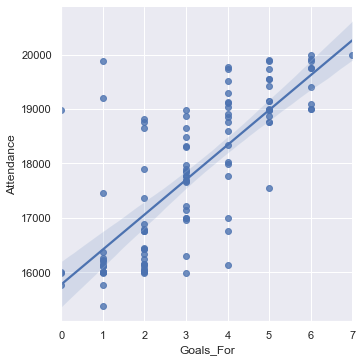

In [9]:
#This graph shows the correlation between goals scored and fans in attendance
sb.set(style='darkgrid')
sb.lmplot(x='Goals_For', y='Attendance',data=combine)

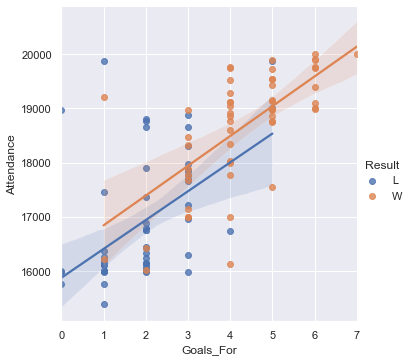

In [10]:
#The hue aspect shows how the correlation differs depending on whether the Rangers won or lost the game
sb.set(style='darkgrid')
sb.lmplot(x='Goals_For', y='Attendance', hue="Result",data=combine)

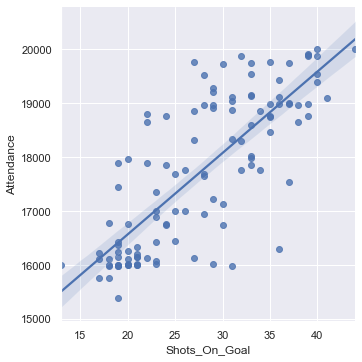

In [11]:
#This shows the amount of shots on goal in relation to attendance, which is a good metric for measuring team performace
sb.set(style='darkgrid')
sb.lmplot(x='Shots_On_Goal', y='Attendance',data=combine)

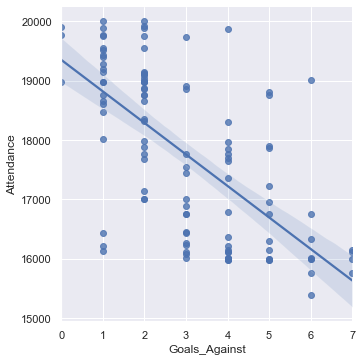

In [12]:
sb.set(style='darkgrid')
sb.lmplot(x='Goals_Against', y='Attendance',data=combine)